In [2]:
from lppls import lppls_cmaes
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [5]:
# Download S&P 500 historical data
data = yf.download('NLR', start='2025-01-27', progress=False)

In [6]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,NLR,NLR,NLR,NLR,NLR
Date,,,,,
2025-02-25,80.519997,81.919998,79.300003,81.919998,475600
2025-02-26,82.080002,83.379997,81.440002,81.809998,219100
2025-02-27,78.720001,83.150002,78.540001,83.150002,283100
2025-02-28,79.309998,79.779999,77.480003,78.449997,322400
2025-03-03,75.870003,80.459999,75.260002,80.459999,568100


<Axes: xlabel='Date'>

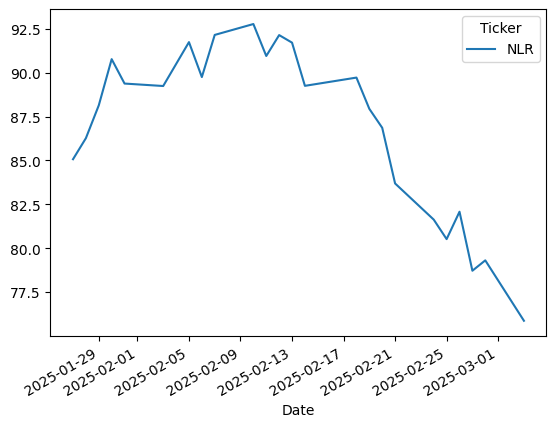

In [8]:
data['Close'].plot()

In [16]:
# convert time to ordinal
time = np.array([pd.Timestamp.toordinal(t1) for t1 in data.index])

In [17]:
time[:10]

array([739278, 739279, 739280, 739281, 739282, 739285, 739286, 739287,
       739288, 739289])

In [23]:
# create list of observation data
price = np.log(data['Close'].values).reshape(-1)
# normalized_priced = price / np.max(price)

In [24]:
price[:10]

array([4.44347444, 4.45748187, 4.47892645, 4.5083288 , 4.49289691,
       4.49132935, 4.50523932, 4.51895847, 4.49702803, 4.5234177 ])

In [25]:
time.shape, price.shape

((25,), (25,))

In [26]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [27]:
observations.shape

(2, 25)

In [35]:
# for _ in range(5):
#     lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
#     tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4)
#     print(pd.Timestamp.fromordinal(int(tc)))

In [28]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4, factor_sigma=0.03)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=142535, Tue Mar  4 21:06:33 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 8.842378461962653e-04 1.0e+00 1.03e+00  3e-02  1e+04 0:08.1
    2    320 8.837901847619858e-04 2.2e+00 1.02e+00  3e-02  6e+03 0:08.2
    3    480 8.838858097182247e-04 4.1e+00 9.93e-01  2e-02  4e+03 0:08.3
   32   5120 8.798995041954251e-04 2.9e+03 1.67e+01  3e-03  1e+00 0:11.4
   42   6720 8.798994789324211e-04 3.5e+03 1.47e+01  9e-06  3e-03 0:12.1
2025-04-20 00:00:00


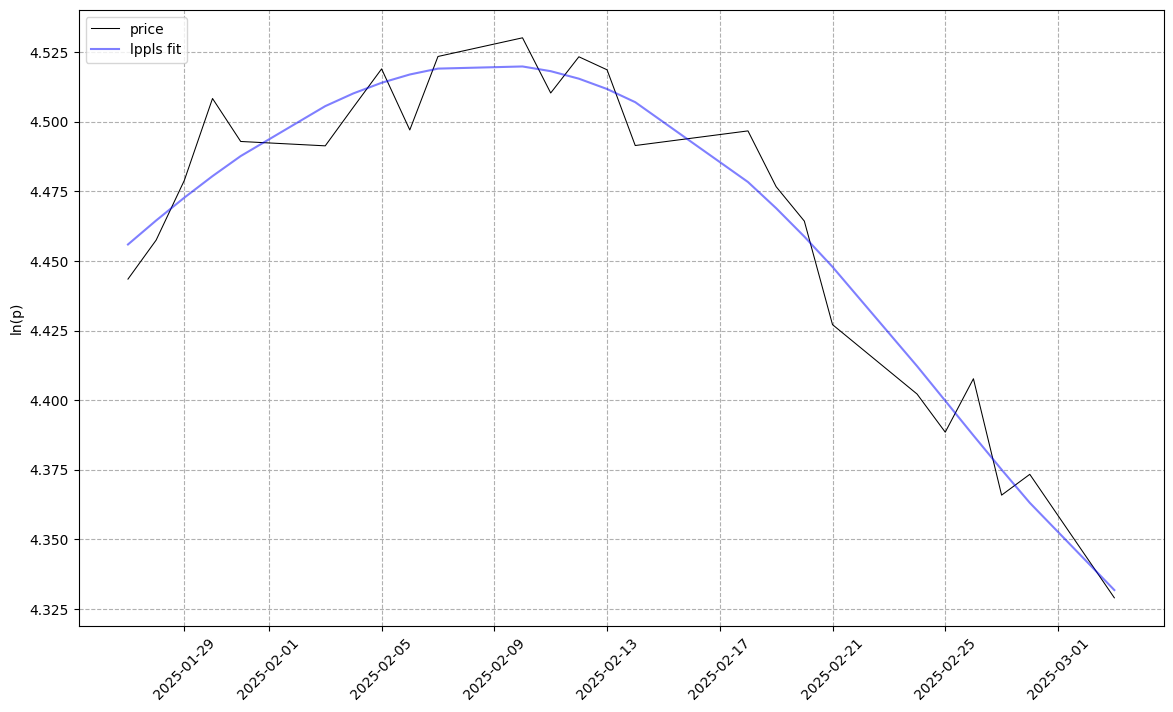

In [29]:
# visualize the fit
lppls_model.plot_fit()